In [4]:
# 必要ライブラリのインポート
import pandas as pd

## 📊 クロス集計（交差集計）の仕組み

### ✅ 概要

クロス集計（交差集計、`crosstab`）とは、**2つ以上のカテゴリ変数の組み合わせごとに件数（頻度）を集計する手法**である。  
これは、カテゴリ間の関係性を定量的かつ視覚的に捉えるための基本的な集計方法であり、Excelにおける「ピボットテーブル」と同様の操作である。

---

### 🛠 使用方法（pandas）

```python
pd.crosstab(行方向のカテゴリ変数, 列方向のカテゴリ変数)
```

例：

```python
pd.crosstab(df["gender"], df["region"])
```

---

### 📋 出力される表の構造

- **行（index）**：最初の引数（例：`gender`）
- **列（columns）**：2番目の引数（例：`region`）
- **セルの値**：行と列のカテゴリが一致する行数（＝件数）

| gender | 関東 | 関西 |
|--------|------|------|
| 女性   | 120  | 85   |
| 男性   | 100  | 95   |
| その他 | 5    | 2    |

---

### 🔍 背後で行われている処理

1. `gender` と `region` のすべてのユニークな値の組み合わせを列挙
2. 各組み合わせに対して該当する行をフィルタ（例：`df[(df["gender"] == "女性") & (df["region"] == "関東")]`）
3. その行数をカウントして表にまとめる

---

### 🎯 クロス集計の用途

- カテゴリ同士の**関係性・分布の可視化**
- **偏りやバイアスの検出**
- 層別サンプリングやセグメント分析の前準備
- モデル学習時の**クラスバランスの確認**

---

### 💡 応用例

- **合計行・列の表示**：
  
  ```python
  pd.crosstab(df["gender"], df["region"], margins=True)
  ```

- **割合で表示**（行ごとに正規化）：

  ```python
  pd.crosstab(df["gender"], df["region"], normalize="index")
  ```

- **複数の変数を組み合わせる**：

  ```python
  pd.crosstab([df["gender"], df["age_group"]], df["region"])
  ```

---

### ✅ まとめ

クロス集計は、カテゴリデータの傾向を把握するための基本かつ強力な手法である。  
特に前処理や探索的データ分析（EDA）において、その活用は欠かせない。

In [ ]:
# master_customerをdfに取り込み、df にあるgenderとregionをクロス集計
master_customer = pd.read_csv("../data/master_customer.csv", dtype={"customer_id": str})
df = master_customer

# genderとregionのクロス集計
cross_tab = pd.crosstab(df["gender"], df["region"])
cross_tab

region,京都府,佐賀県,北海道,和歌山県,埼玉県,大分県,大阪府,奈良県,宮城県,富山県,...,神奈川県,福岡県,秋田県,茨城県,長野県,青森県,静岡県,高知県,鳥取県,鹿児島県
gender,,,,,,,,,,,,,,,,,,,,,
0.0,226,127,249,119,255,136,365,131,134,119,...,276,273,101,241,135,124,127,128,115,123
1.0,147,88,154,76,161,72,229,73,80,79,...,134,168,81,158,70,79,76,77,81,83
2.0,5,1,8,3,4,3,9,2,0,2,...,1,3,3,6,2,1,2,1,3,1


In [7]:
# 必要ライブラリのインポート
import pandas as pd


# データを読み込む
transaction_history = pd.read_csv("../data/transaction_history.csv", dtype={"customer_id": str})

# 顧客IDごとの行数（購買回数）を集計
customer_purchase_counts = (
    transaction_history["customer_id"].value_counts().reset_index()
)
customer_purchase_counts.columns = ["customer_id", "purchase_count"]

# 結果の表示
customer_purchase_counts

,customer_id,purchase_count
0,00284868,15
1,00284913,15
2,00284906,15
3,00284907,15
4,00284908,15
...,...,...
277230,00102423,1
277231,00102424,1
277232,00102425,1
277233,00102426,1


In [10]:
# purchase_dateをdatetime型に変換, エラーになる場合は無視して処理を続行
transaction_history["purchase_date"] = pd.to_datetime(
    transaction_history["purchase_date"], errors="coerce"
)

# エラーになる行を確認 (purchase_dateがNaTになっている行)
error_rows = transaction_history[transaction_history["purchase_date"].isnull()]
print(f"Error rows:\n{error_rows}")

# customer_idごとにpurchase_dateの最新日付を取得
latest_purchase_dates = (
    transaction_history.groupby("customer_id")["purchase_date"].max().reset_index()
)

# 結果を表示
latest_purchase_dates.head()

Error rows:
       customer_id product_id purchase_date  purchase_amount  redeem_coupon  \
1321      00011316   092V2XUB           NaT             8100          False   
7329      00017324   Y8P9D94C           NaT           468600          False   
24489     00034484   8WIZH3FY           NaT             8800          False   
25865     00035860   0FK3T96F           NaT            62200          False   
27703     00037698   3GNEZ25O           NaT            74300          False   
...            ...        ...           ...              ...            ...   
458162    00024236   YF829ECH           NaT           188800          False   
458163    00012691   SPDDDXY2           NaT           177200          False   
458164    00024355   UA56Q0XP           NaT           141700          False   
458165    00024126   G4WT97YC           NaT           224400          False   
458166    00012370   1QDAGFIK           NaT           217300          False   

        final_settlement_amount payment

,customer_id,purchase_date
0,00010000,2018-11-30
1,00010001,2021-10-18
2,00010002,2018-01-15
3,00010003,2018-03-27
4,00010004,2024-12-07


In [11]:
!pip install japanize-matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


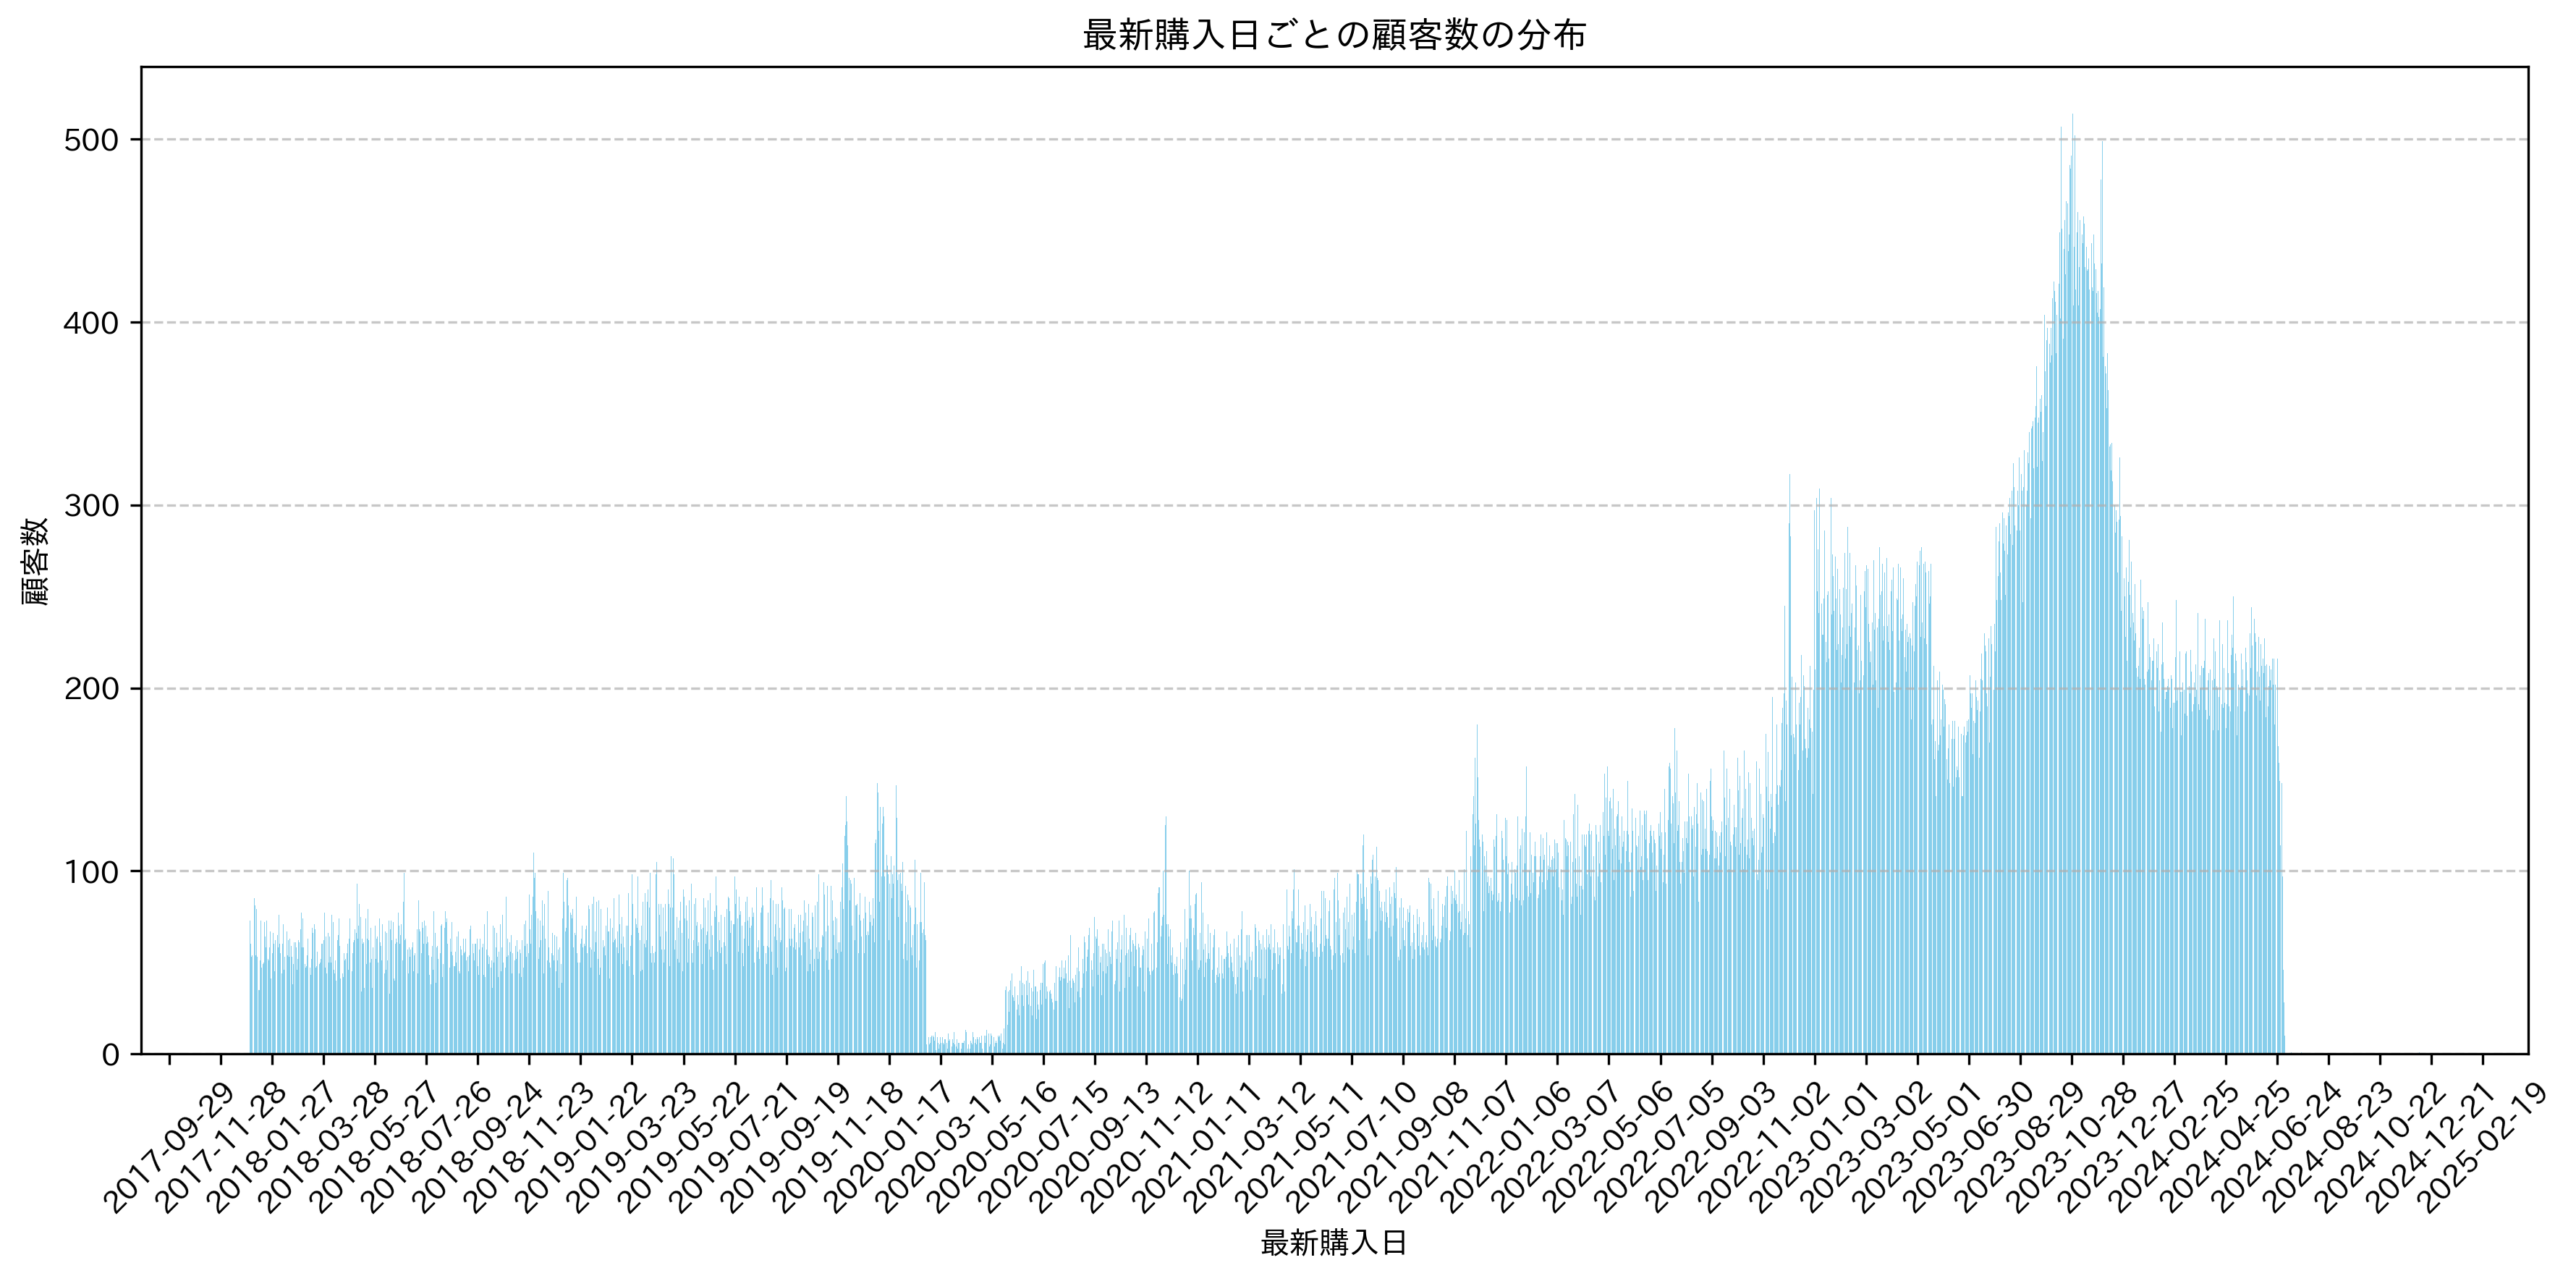

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import japanize_matplotlib
import pandas as pd

# 最新購入日の分布を集計
purchase_date_counts = (
    latest_purchase_dates["purchase_date"].value_counts().reset_index()
)
purchase_date_counts.columns = ["purchase_date", "count"]

# 日付順にソート
purchase_date_counts = purchase_date_counts.sort_values(by="purchase_date")

# 日付をdatetime型に変換（必要に応じて）
purchase_date_counts["purchase_date"] = pd.to_datetime(
    purchase_date_counts["purchase_date"]
)

# 可視化
plt.figure(figsize=(12, 6), dpi=300)
plt.bar(
    purchase_date_counts["purchase_date"],
    purchase_date_counts["count"],
    color="skyblue",
)

# 60日ごとの目盛りを設定
locator = mdates.DayLocator(interval=60)
formatter = mdates.DateFormatter("%Y-%m-%d")

plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.xlabel("最新購入日")
plt.ylabel("顧客数")
plt.title("最新購入日ごとの顧客数の分布")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

# データをCSVから読み込む（ファイル名は適宜変更）
transaction_history = pd.read_csv("../data/transaction_history.csv", dtype={"customer_id": str})

# purchase_dateをdatetime型に変換、エラーを無視して処理を続行
# errors='coerce'を指定することで、不正な日付をNaT（Not a Time）に変換します
transaction_history["purchase_date"] = pd.to_datetime(
    transaction_history["purchase_date"], errors="coerce"
)

# エラーになった行を確認 (purchase_dateがNaTになっている行)
error_rows = transaction_history[transaction_history["purchase_date"].isnull()]
print(f"Error rows:\n{error_rows}")

# customer_idごとにpurchase_dateの件数をカウント
order_counts = (
    transaction_history.groupby("customer_id")["purchase_date"].count().reset_index()
)
order_counts.columns = ["customer_id", "freqency"]

# 結果を表示
order_counts.head()

Error rows:
       customer_id product_id purchase_date  purchase_amount  redeem_coupon  \
1321      00011316   092V2XUB           NaT             8100          False   
7329      00017324   Y8P9D94C           NaT           468600          False   
24489     00034484   8WIZH3FY           NaT             8800          False   
25865     00035860   0FK3T96F           NaT            62200          False   
27703     00037698   3GNEZ25O           NaT            74300          False   
...            ...        ...           ...              ...            ...   
458162    00024236   YF829ECH           NaT           188800          False   
458163    00012691   SPDDDXY2           NaT           177200          False   
458164    00024355   UA56Q0XP           NaT           141700          False   
458165    00024126   G4WT97YC           NaT           224400          False   
458166    00012370   1QDAGFIK           NaT           217300          False   

        final_settlement_amount payment

,customer_id,freqency
0,00010000,1
1,00010001,1
2,00010002,1
3,00010003,1
4,00010004,1


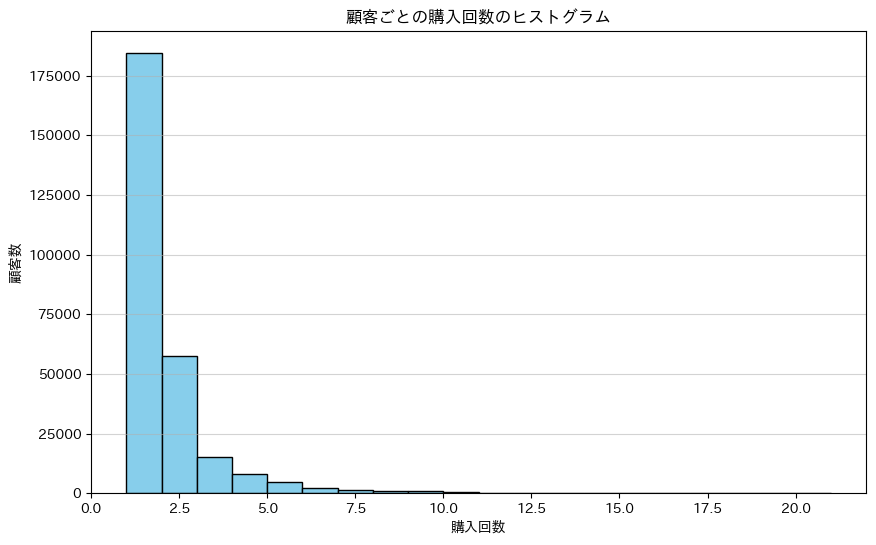

In [15]:
# Freaqueancyのヒストグラムを描画
plt.figure(figsize=(10, 6))
plt.hist(
    order_counts["freqency"],
    bins=list(range(1, 22)),
    color="skyblue",
    edgecolor="black",
)
plt.xlabel("購入回数")
plt.ylabel("顧客数")
plt.title("顧客ごとの購入回数のヒストグラム")
plt.grid(axis="y", alpha=0.55)
plt.show()

In [18]:
# 必要なライブラリのインポート
import pandas as pd

# データの読み込み
transaction_history = pd.read_csv("../data/transaction_history.csv", dtype={"customer_id": str})
# customer_idごとにpurchase_amountの合計を計算
customer_purchase_sum = (
    transaction_history.groupby("customer_id")["purchase_amount"]
    .sum()
    .reset_index(name="Monetary")
)

# 結果の表示
customer_purchase_sum.head()

,customer_id,Monetary
0,00010000,9300
1,00010001,8300
2,00010002,164700
3,00010003,46000
4,00010004,69300


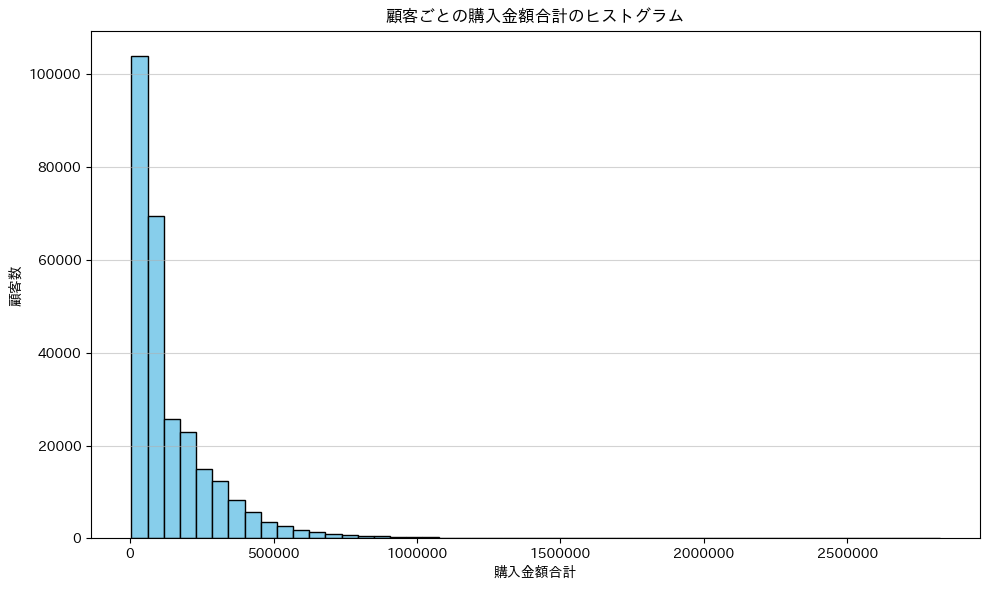

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(customer_purchase_sum["Monetary"], bins=50, color="skyblue", edgecolor="black")
ax.ticklabel_format(style="plain", axis="x")
ax.set_xlabel("購入金額合計")
ax.set_ylabel("顧客数")
ax.set_title("顧客ごとの購入金額合計のヒストグラム")
ax.grid(axis="y", alpha=0.55)
plt.tight_layout()
plt.show()

count    277235.00
mean     139575.82
std      170363.29
min        5000.00
25%       10500.00
50%       86600.00
75%      194700.00
max     2821700.00
Name: Monetary, dtype: float64


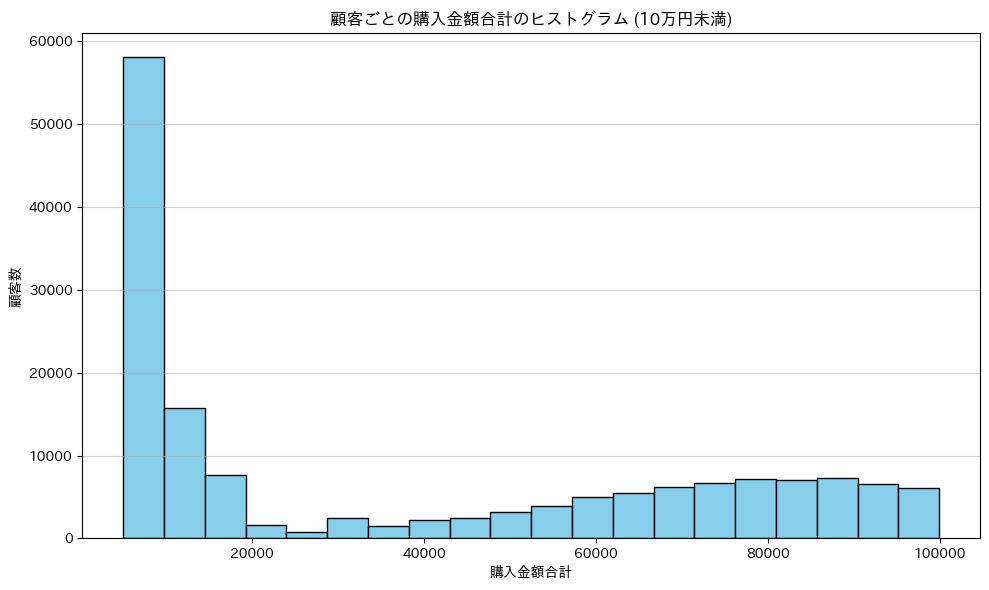

In [20]:
# customer_purchase_sumの、purchase_amountの基本統計量算出。
pd.set_option("display.float_format", "{:.2f}".format)
print(customer_purchase_sum["Monetary"].describe())
pd.reset_option("display.float_format")

# 10万円（100000円）よりも小さな値のみをフィルタリング
monetary_filtered = customer_purchase_sum[customer_purchase_sum["Monetary"] < 100000]

# フィルタリングされたデータでヒストグラムを描画
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(monetary_filtered["Monetary"], bins=20, color="skyblue", edgecolor="black")
ax.ticklabel_format(style="plain", axis="x")
ax.set_xlabel("購入金額合計")
ax.set_ylabel("顧客数")
ax.set_title("顧客ごとの購入金額合計のヒストグラム (10万円未満)")
ax.grid(axis="y", alpha=0.55)
plt.tight_layout()
plt.show()